In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

In [2]:
subjects = ['sub-NDARINV8TWNRCGG', 'sub-NDARINVF7UTX830', 'sub-NDARINV5XV8TY4W', 'sub-NDARINV8E028M6F', 'sub-NDARINVV1F9DNZH', 'sub-NDARINV0CF1U8X8', 'sub-NDARINV10HWA6YU', 'sub-NDARINV1DDX454E', 'sub-NDARINV1H63RRB3', 'sub-NDARINV1JXDFV9Z']
sessions = ['ses-baselineYear1Arm1', 'ses-2YearFollowUpYArm1', 'ses-4YearFollowUpYArm1']

In [110]:
subject_matrices = []
for sub in subjects:
    sub_matrices = []
    for ses in sessions:
        path = '/scratch/users/yiranf/abcd_fc/' + sub + '/' + ses + '_concatenate_corr.csv'
        avg_matrix = np.genfromtxt(path, delimiter=',')
        sub_matrices.append(avg_matrix)
    subject_matrices.append(sub_matrices)

In [9]:
def within_similarity(subject_matrices):
    """
    Compute within-subject similarity by calculating correlations between different sessions for each subject.

    Parameters:
    - subject_matrices (list of lists of 2D arrays): List of matrices for each subject.

    Returns:
    - within_subject_correlations (list of 2D arrays): List of correlation matrices for each subject.
    """

    num_subjects = len(subject_matrices)
    within_subject_correlations = []

    for subject_index in range(num_subjects):
        matrices = subject_matrices[subject_index]
        num_sessions = len(matrices)

        correlations = np.zeros((num_sessions, num_sessions))

        for i in range(num_sessions):
            for j in range(num_sessions):
                matrix_i_flat = matrices[i].flatten()
                matrix_j_flat = matrices[j].flatten()
                correlation, _ = pearsonr(matrix_i_flat, matrix_j_flat)
                correlations[i, j] = correlation

        within_subject_correlations.append(correlations)

    return within_subject_correlations

In [13]:
def between_subject_similarity_concatenation(subject_matrices):
    """
    Compute between-subject similarity by concatenating matrices from different sessions for each subject.

    Parameters:
    - subject_matrices (list of lists of 2D arrays): List of matrices for each subject and each session.

    Returns:
    - between_subject_correlations (2D array): Correlation matrix between different subjects based on concatenated matrices.
    """

    num_subjects = len(subject_matrices)
    num_sessions = len(subject_matrices[0])

    concatenated_subject_matrices = [np.concatenate(subject_matrices[i], axis=-1) for i in range(num_subjects)]

    between_subject_correlations = np.zeros((num_subjects, num_subjects))

    for i in range(num_subjects):
        for j in range(num_subjects):
            subject_i_concat_matrix_flat = concatenated_subject_matrices[i].flatten()
            subject_j_concat_matrix_flat = concatenated_subject_matrices[j].flatten()
            correlation, _ = pearsonr(subject_i_concat_matrix_flat, subject_j_concat_matrix_flat)
            between_subject_correlations[i, j] = correlation
    
    return between_subject_correlations

In [26]:
def between_subject_similarity(subject_matrices):
    """
    Compute between-subject similarity for each session.

    Parameters:
    - subject_matrices (list of lists of 2D arrays): List of matrices for each subject and each session.

    Returns:
    - between_subject_correlations (list of 2D arrays): List of correlation matrices for each session.
    """

    num_subjects = len(subject_matrices)
    num_sessions = len(subject_matrices[0])

    between_subject_correlations = []

    for session in range(num_sessions):
        session_matrices = [subject[session] for subject in subject_matrices]

        concatenated_session_matrices = np.concatenate(session_matrices, axis=-1)

        session_correlations = np.zeros((num_subjects, num_subjects))

        for i in range(num_subjects):
            for j in range(num_subjects):
                subject_i_matrix_flat = session_matrices[i].flatten()
                subject_j_matrix_flat = session_matrices[j].flatten()
                correlation, _ = pearsonr(subject_i_matrix_flat, subject_j_matrix_flat)
                session_correlations[i, j] = correlation

        between_subject_correlations.append(session_correlations)

    return between_subject_correlations

In [10]:
within_subject_correlations = within_similarity(subject_matrices)

for subject_index, correlations in enumerate(within_subject_correlations):
    print(f"Within-subject similarity for {subjects[subject_index]}:\n{correlations}\n")

Within-subject similarity for sub-NDARINV8TWNRCGG:
[[1.         0.92771473 0.90740493]
 [0.92771473 1.         0.94083221]
 [0.90740493 0.94083221 1.        ]]

Within-subject similarity for sub-NDARINVF7UTX830:
[[1.         0.84740809 0.85933862]
 [0.84740809 1.         0.88791697]
 [0.85933862 0.88791697 1.        ]]

Within-subject similarity for sub-NDARINV5XV8TY4W:
[[1.         0.82163109 0.80511171]
 [0.82163109 1.         0.8570656 ]
 [0.80511171 0.8570656  1.        ]]

Within-subject similarity for sub-NDARINV8E028M6F:
[[1.         0.76564522 0.74197892]
 [0.76564522 1.         0.78802901]
 [0.74197892 0.78802901 1.        ]]

Within-subject similarity for sub-NDARINVV1F9DNZH:
[[1.         0.87316953 0.88018436]
 [0.87316953 1.         0.90201878]
 [0.88018436 0.90201878 1.        ]]

Within-subject similarity for sub-NDARINV0CF1U8X8:
[[1.         0.85774546 0.82617709]
 [0.85774546 1.         0.87423107]
 [0.82617709 0.87423107 1.        ]]

Within-subject similarity for sub-

In [27]:
between_subject_correlations = between_subject_similarity(subject_matrices)

print("Between-subject similarity for separate sessions:")
print(between_subject_correlations)

Between-subject similarity for separate sessions:
[array([[1.        , 0.76184835, 0.74342075, 0.64741842, 0.72340765,
        0.72148609, 0.7513539 , 0.38035681, 0.63743234, 0.63646651],
       [0.76184835, 1.        , 0.76079796, 0.68600092, 0.77446225,
        0.76489824, 0.75817457, 0.46173967, 0.71925678, 0.65781292],
       [0.74342075, 0.76079796, 1.        , 0.68223025, 0.75929151,
        0.74151778, 0.73389297, 0.39619734, 0.70849596, 0.57515678],
       [0.64741842, 0.68600092, 0.68223025, 1.        , 0.63475896,
        0.70409375, 0.65467717, 0.48912457, 0.62076766, 0.66066561],
       [0.72340765, 0.77446225, 0.75929151, 0.63475896, 1.        ,
        0.71412749, 0.77383462, 0.45779681, 0.76223646, 0.60057548],
       [0.72148609, 0.76489824, 0.74151778, 0.70409375, 0.71412749,
        1.        , 0.67595832, 0.42088232, 0.64140667, 0.66746553],
       [0.7513539 , 0.75817457, 0.73389297, 0.65467717, 0.77383462,
        0.67595832, 1.        , 0.53313674, 0.66629046, 0.6

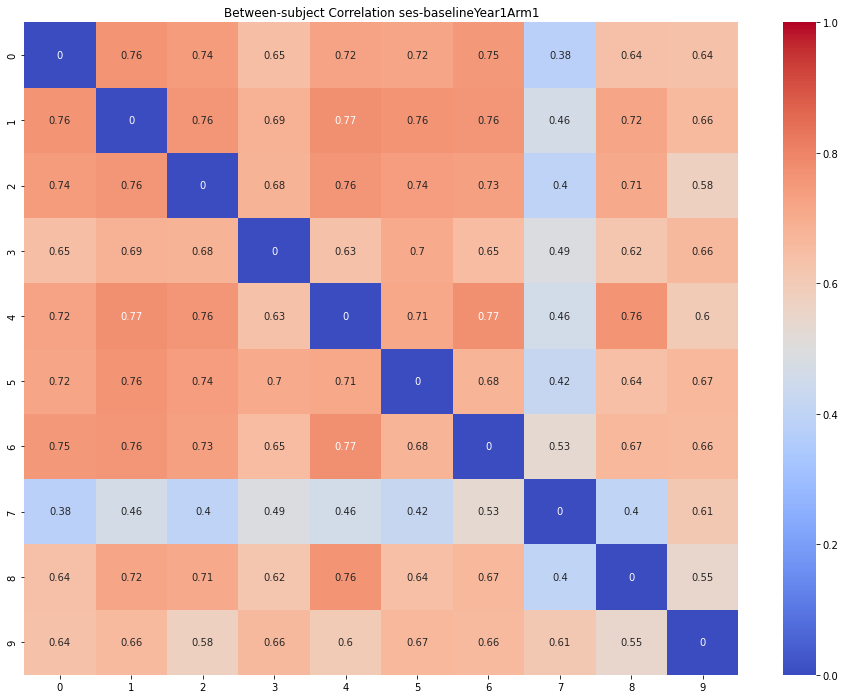

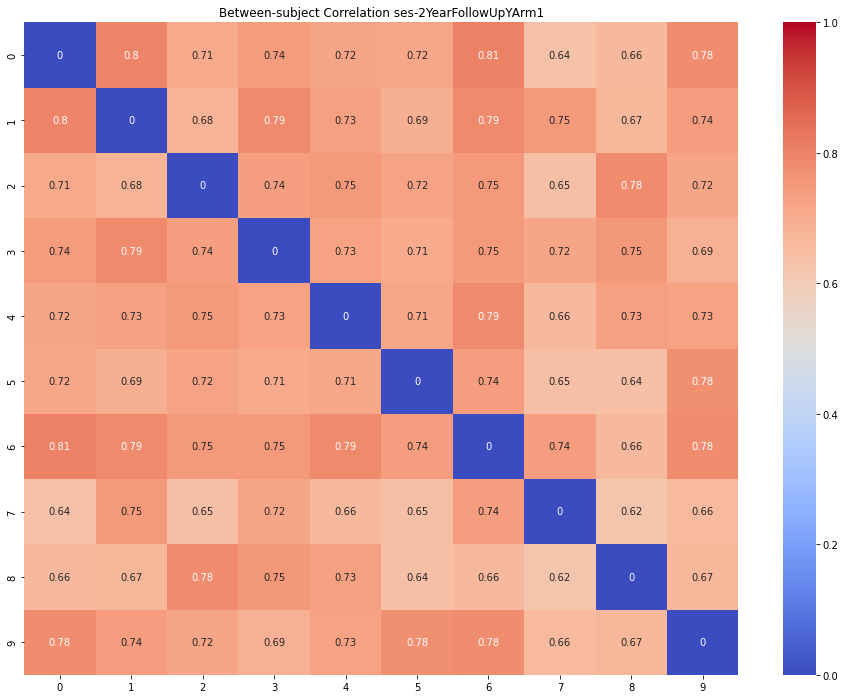

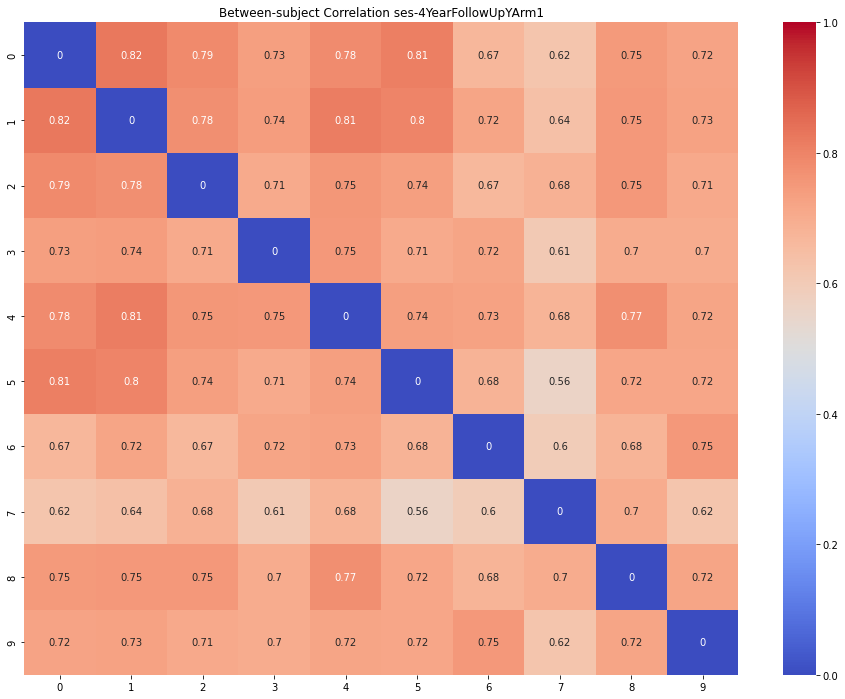

In [157]:
for session in range(len(between_subject_correlations)):
    session_correlations = between_subject_correlations[session]
    np.fill_diagonal(session_correlations, 0)
    fig, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(session_correlations, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    ax.set_title(f'Between-subject Correlation {sessions[session]}')
    plt.savefig('between_subject_corr_' + sessions[session] + '.png')

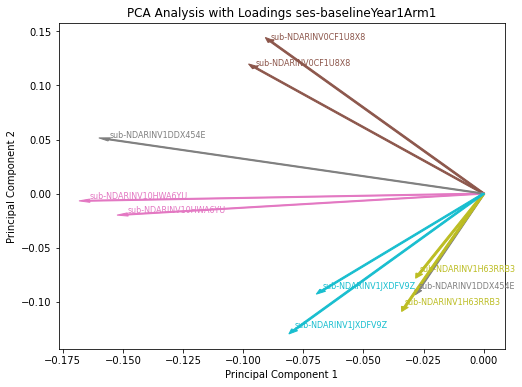

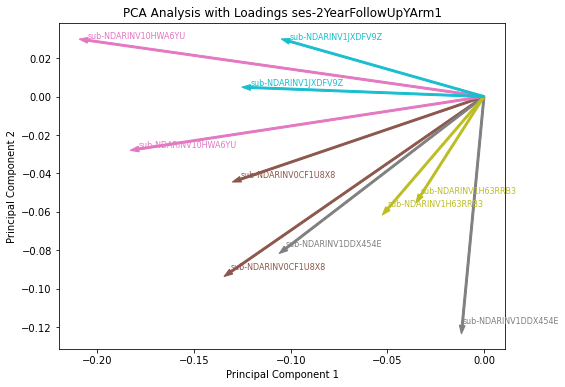

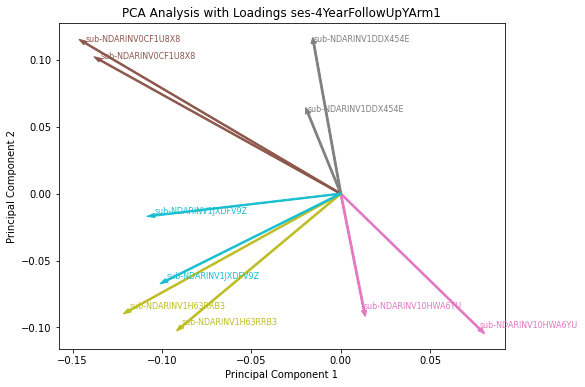

In [159]:
def plot_pca_loadings(subject_matrices):
    """
    Plot PCA loadings for each subject and each session.

    Parameters:
    - subject_matrices (list of lists of 2D arrays): List of matrices for each subject and each session.
    """

    num_subjects = len(subject_matrices)
    num_sessions = len(subject_matrices[0])

    for session_index in range(num_sessions):
        fig, ax = plt.subplots(figsize=(8, 6))

        for subject_index in range(5,10):
            matrix = subject_matrices[subject_index][session_index]

            pca = PCA(n_components=2)
            components = pca.fit_transform(matrix)

            loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

            color = plt.cm.tab10(subject_index % 10)            
            ax.arrow(0, 0, loadings[0, 0], loadings[0, 1], fc=color, ec=color)
            ax.arrow(0, 0, loadings[1, 0], loadings[1, 1], fc=color, ec=color)
            ax.text(loadings[0, 0], loadings[0, 1], f'{subjects[subject_index]}', ha='left', va='bottom', color=color, fontsize=8)
            ax.text(loadings[1, 0], loadings[1, 1], f'{subjects[subject_index]}', ha='left', va='bottom', color=color, fontsize=8)

        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_title(f'PCA Analysis with Loadings {sessions[session_index]}')

        plt.show()

plot_pca_loadings(subject_matrices)

In [72]:
abcd_fc = pd.read_csv('/scratch/users/yiranf/abcd_fc_official.csv')

In [107]:
official_subjects = ['NDAR_INV8TWNRCGG', 'NDAR_INVF7UTX830', 'NDAR_INV5XV8TY4W', 'NDAR_INV8E028M6F', 'NDAR_INVV1F9DNZH', 'NDAR_INV0CF1U8X8', 'NDAR_INV10HWA6YU', 'NDAR_INV1DDX454E', 'NDAR_INV1H63RRB3', 'NDAR_INV1JXDFV9Z']
official_sessions = ['baseline_year_1_arm_1', '2_year_follow_up_y_arm_1', '4_year_follow_up_y_arm_1']

In [111]:
abcd_fc = pd.read_csv('/scratch/users/yiranf/abcd_fc_official.csv')

official_matrices = []
for sub in official_subjects:
    official_sub_matrices = []
    for ses in official_sessions:
        matrix = abcd_fc[(abcd_fc['src_subject_id'] == sub) & (abcd_fc['eventname'] == ses)].iloc[:, 2:].values.reshape(13, 13)
        official_sub_matrices.append(matrix)
    official_matrices.append(official_sub_matrices)

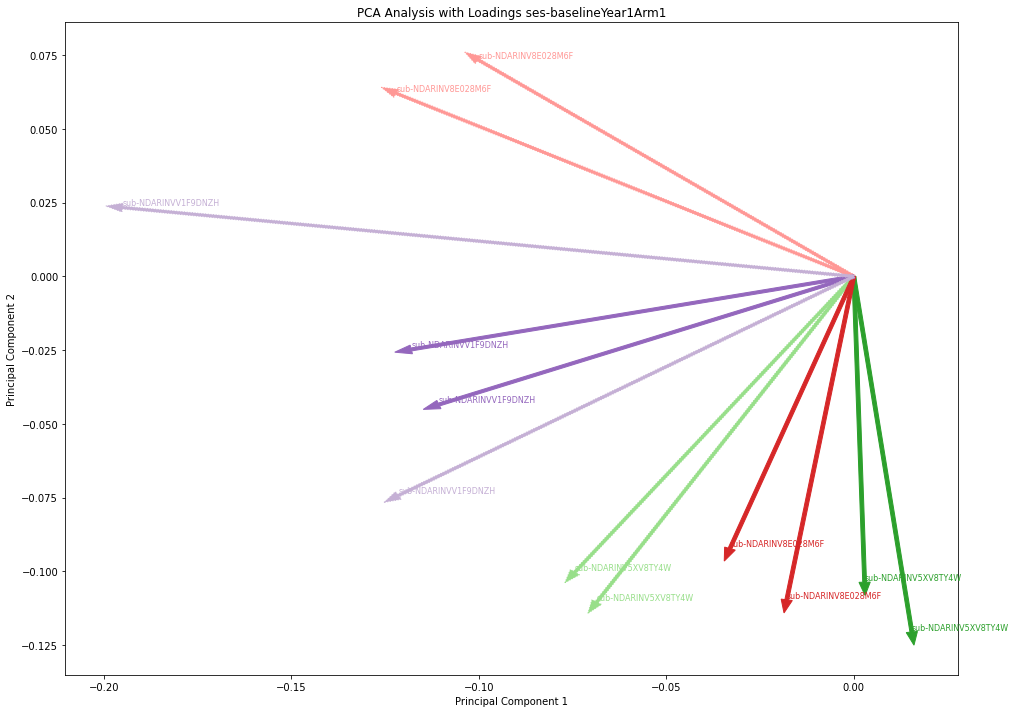

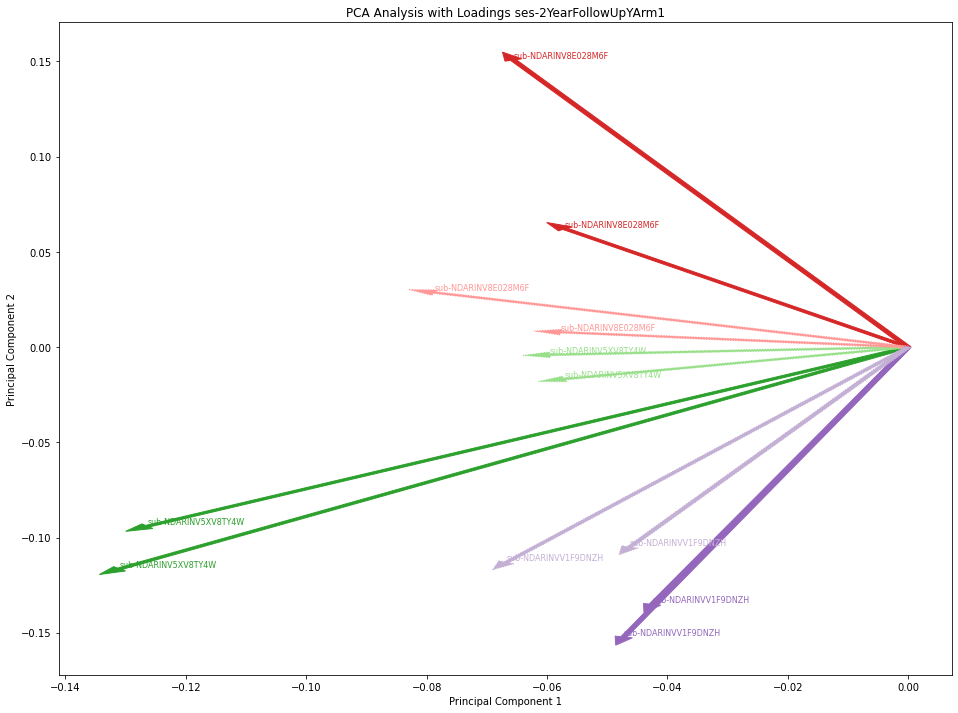

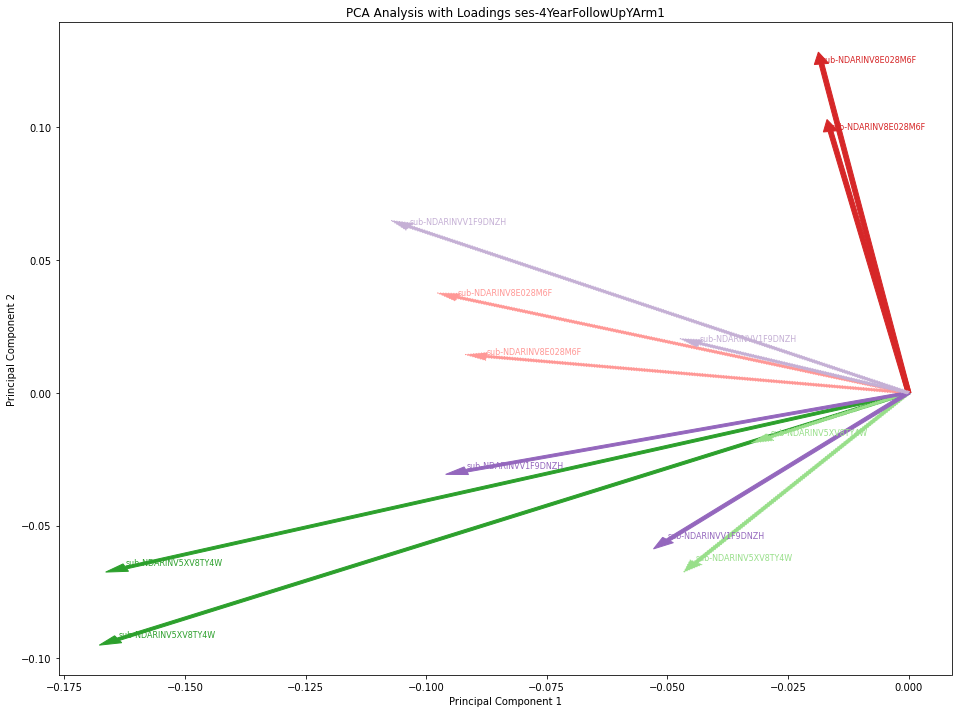

In [160]:
def plot_pca_loadings_compare(subject_matrices, official_matrices):
    """
    Plot PCA loadings for subject matrices and official matrices on the same plot for each session.

    Parameters:
    - subject_matrices (list of lists of 2D arrays): List of matrices for each subject and each session.
    - official_matrices (list of lists of 2D arrays): List of official release matrices for each subject and each session.
    """

    num_subjects = len(subject_matrices)
    num_sessions = len(subject_matrices[0])

    for session_index in range(num_sessions):
        fig, ax = plt.subplots(figsize=(16, 12))

        for subject_index in range(2,5):
            matrix = subject_matrices[subject_index][session_index]
            official = official_matrices[subject_index][session_index]

            pca = PCA(n_components=2)
            components = pca.fit_transform(matrix)
            
            pca_official = PCA(n_components=2)
            components_official = pca_official.fit_transform(official)

            loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
            loadings_official = pca_official.components_.T * np.sqrt(pca_official.explained_variance_)

            color = plt.cm.tab10(subject_index % 10)   
            
            ax.arrow(0, 0, loadings[0, 0], loadings[0, 1], fc=color, ec=color)
            ax.arrow(0, 0, loadings[1, 0], loadings[1, 1], fc=color, ec=color)
            ax.text(loadings[0, 0], loadings[0, 1], f'{subjects[subject_index]}', ha='left', va='bottom', color=color, fontsize=8)
            ax.text(loadings[1, 0], loadings[1, 1], f'{subjects[subject_index]}', ha='left', va='bottom', color=color, fontsize=8)
            
            color = plt.cm.tab20((subject_index * 2 + 1) % 20) 
            
            ax.arrow(0, 0, loadings_official[0, 0], loadings_official[0, 1], fc=color, ec=color, linestyle='dotted')
            ax.arrow(0, 0, loadings_official[1, 0], loadings_official[1, 1], fc=color, ec=color, linestyle='dotted')
            ax.text(loadings_official[0, 0], loadings_official[0, 1], f'{subjects[subject_index]}', ha='left', va='bottom', color=color, fontsize=8)
            ax.text(loadings_official[1, 0], loadings_official[1, 1], f'{subjects[subject_index]}', ha='left', va='bottom', color=color, fontsize=8)
            

        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_title(f'PCA Analysis with Loadings {sessions[session_index]}')

        plt.savefig('pca_analysis_' + sessions[session_index] + '.png')

plot_pca_loadings_compare(subject_matrices, official_matrices)